In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Perplexity experiment

Trying to get my head around perplexity as a measure. This notebook does the following:

* Generate data from a ground truth unigram distribution (p(0)=0.9, p(1)=0.09, p(2)=0.01)
* Estimate the ground truth n-gram distributions from the data
* Interpret the n-gram distribution as a posterior distribution conditioned on n-1 (for 3-gram, P(x[n] | x[n-1], x[n-2]))
* Measure the perplexity of the sequence as described by each posterior

In [78]:
# Create sparse data
true_unigram = [0.9, 0.09, 0.01]
seq_len = 10000
sequence = np.random.choice(len(true_unigram), seq_len, p=true_unigram)
print sequence[:100]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0]


In [79]:
# Calculate n-gram distrbutions from sample of ground truth unigram distribution
max_ngram = 6
n_to_distribution = {}
for n in xrange(1, max_ngram + 1):
    ngrams = []
    for i in xrange(seq_len):
        ngram = sequence[i:i + n]
        if len(ngram) != n:
            break
        ngrams.append(ngram)
    ngram_to_count = {}
    for ngram in ngrams:
        ngram = tuple(ngram)
        if ngram not in ngram_to_count:
            ngram_to_count[ngram] = 0
        ngram_to_count[ngram] += 1
    ngram_distribution = {i:float(c) / len(ngrams) for i, c in ngram_to_count.items()}
    n_to_distribution[n] = ngram_distribution

for n in xrange(1, min(4, max_ngram + 1)):
    print '{}-gram distribution'.format(n)
    for ngram, proportion in sorted(n_to_distribution[n].items(), key=lambda x: -x[1]):
        print '{}: {}'.format(ngram, n_to_distribution[n][ngram])

1-gram distribution
(0,): 0.8972
(1,): 0.0922
(2,): 0.0106
2-gram distribution
(0, 0): 0.804680468047
(1, 0): 0.0831083108311
(0, 1): 0.0828082808281
(0, 2): 0.00970097009701
(2, 0): 0.00940094009401
(1, 1): 0.00820082008201
(2, 1): 0.001200120012
(1, 2): 0.000900090009001
3-gram distribution
(0, 0, 0): 0.72274454891
(0, 1, 0): 0.0746149229846
(0, 0, 1): 0.0739147829566
(1, 0, 0): 0.0736147229446
(0, 2, 0): 0.00850170034007
(2, 0, 0): 0.00830166033207
(1, 0, 1): 0.00820164032807
(0, 0, 2): 0.00800160032006
(0, 1, 1): 0.00740148029606
(1, 1, 0): 0.00730146029206
(1, 0, 2): 0.00130026005201
(2, 1, 0): 0.00120024004801
(0, 2, 1): 0.00120024004801
(1, 2, 0): 0.000900180036007
(0, 1, 2): 0.000800160032006
(1, 1, 1): 0.000800160032006
(2, 0, 1): 0.000700140028006
(2, 0, 2): 0.000400080016003
(1, 1, 2): 0.000100020004001


In [80]:
# Calculate perplexity of n-gram distribution against the sample
n_to_perplexity = {}
for n in xrange(1, max_ngram + 1):
    distribution = n_to_distribution[n]
    ncontext = n - 1
    log_prob_cum = 0.0
    for i in xrange(seq_len):
        ngram = tuple(sequence[i:i + n])
        if len(ngram) != n:
            break
        posterior = distribution[ngram]
        log_prob_cum += np.log(posterior)
    negative_log_prob = -log_prob_cum / (len(sequence) - (n - 1))
    perplexity = np.exp(negative_log_prob)
    n_to_perplexity[n] = perplexity

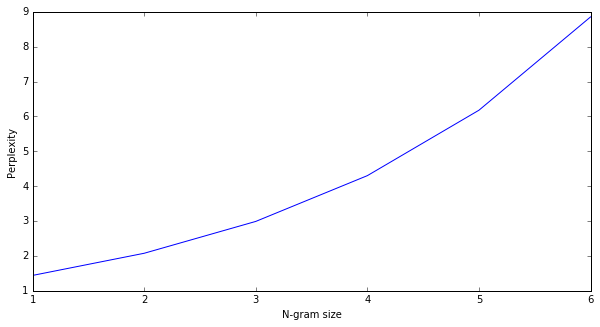

In [81]:
# Plot perplexity values
plt.figure(figsize=(10, 5))
ns = range(1, max_ngram + 1)
plt.plot(ns, [n_to_perplexity[n] for n in ns])
plt.xlabel('N-gram size')
plt.ylabel('Perplexity')